<a href="https://colab.research.google.com/github/CesarCasasola/MachineLearningPython/blob/main/clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calidad del vino blanco

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#configurando la impresion de numeros de punto flotante a aun max de 3 digitos despues del punto
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.7.0


In [ ]:
original_data_set = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
original_data_set.info()
original_data_set.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Limpieza de los datos

In [ ]:
#Todos los atributos son numéricos del tipo float64, por lo que no será necesario aplicar codificación
#La clase es del tipo int64, sin embargo es un dato categórico del tipo ordinal
#Verificando missing values
original_data_set.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
original_data_set.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [ ]:
np.sort(original_data_set['quality'].unique())

array([3, 4, 5, 6, 7, 8, 9])

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

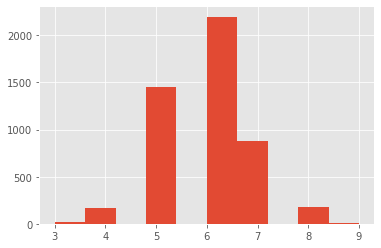

In [ ]:
original_data_set['quality'].hist()
original_data_set['quality'].value_counts()

In [ ]:
#Aunque la clase es del tipo ordinal, ya que así se describe en el archivo NAMES del dataset:
#   Output variable (based on sensory data): 
#   12 - quality (score between 0 and 10)
#no tiene instancias para todos los valores de la escala, por lo que se decide reestructurar la clase de la siguiente manera:
# Rango    Nombre de la Clase    Valor
# 0-4           Mala               0
# 5-7           Regular            1 
# 8-10          Buena              2
df = original_data_set.copy()
df['quality'] = [0 if x<=4 else 1 if x>=5 and x<=7 else 2 for x in df['quality']]

1    4535
0     183
2     180
Name: quality, dtype: int64

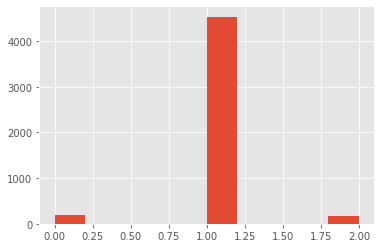

In [ ]:
df['quality'].hist()
df['quality'].value_counts()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06e3e33450>,
      dtype=object)

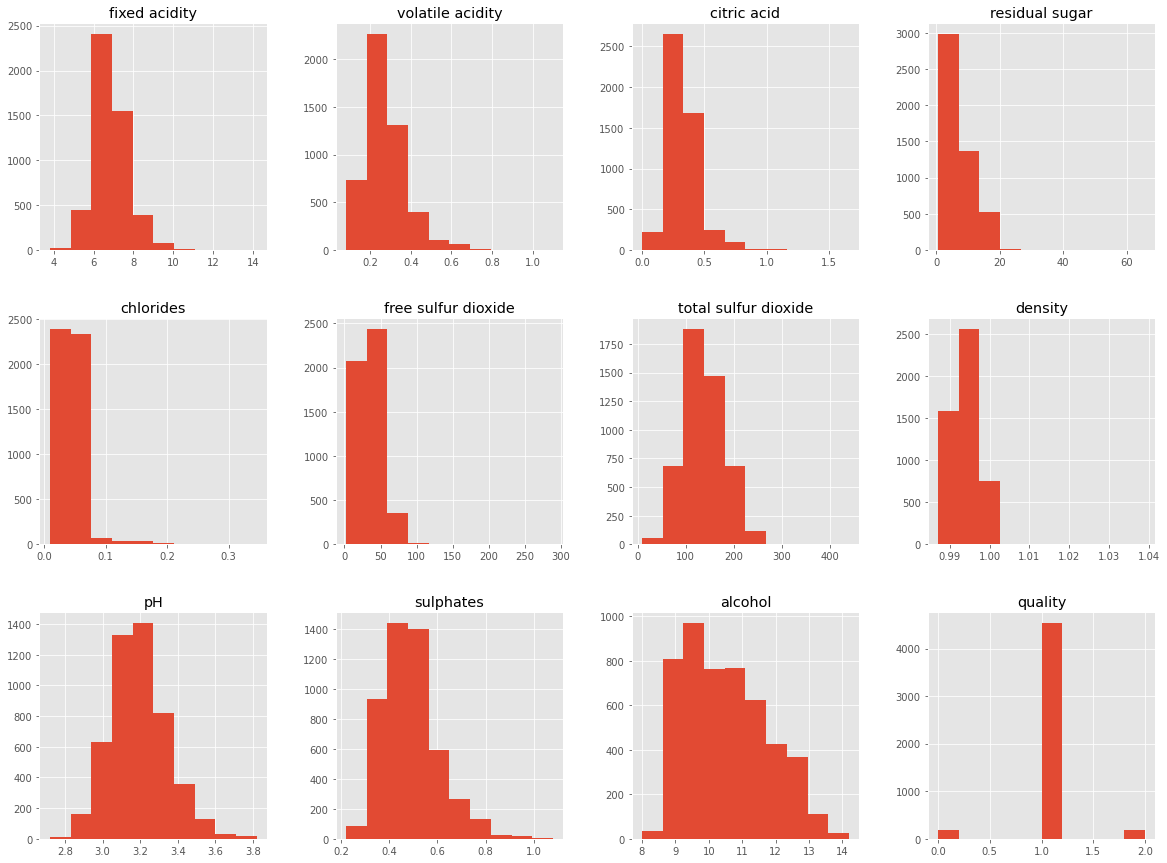

In [ ]:
df.hist(figsize=(20,15), layout=(3,4))

In [ ]:
#Separando los datos en grupos de entrenamiento y validacion
X = df.iloc[:, 0:11]
y = df['quality']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())

[[  6.86    0.279   0.333   6.351   0.046  35.026 137.946   0.994   3.188
    0.488  10.524]]


## Definiendo un modelo con DNN

In [ ]:

dnn_model = keras.Sequential([
                 normalizer,
                 layers.Dense(64, activation='relu'),
                 layers.Dense(64, activation='relu'),
                 layers.Dense(5)             
])

In [ ]:
dnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
dnn_model.fit(X_train, y_train, epochs=50)

Epoch 1/50
123/123 [==============================] - 1s 2ms/step - loss: 0.4764 - accuracy: 0.9119
Epoch 2/50
123/123 [==============================] - 0s 2ms/step - loss: 0.3065 - accuracy: 0.9265
Epoch 3/50
123/123 [==============================] - 0s 2ms/step - loss: 0.2825 - accuracy: 0.9265
Epoch 4/50
123/123 [==============================] - 0s 2ms/step - loss: 0.2702 - accuracy: 0.9267
Epoch 5/50
123/123 [==============================] - 0s 2ms/step - loss: 0.2605 - accuracy: 0.9270
Epoch 6/50
123/123 [==============================] - 0s 2ms/step - loss: 0.2542 - accuracy: 0.9285
Epoch 7/50
123/123 [==============================] - 0s 2ms/step - loss: 0.2465 - accuracy: 0.9288
Epoch 8/50
123/123 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.9275
Epoch 9/50
123/123 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.9280
Epoch 10/50
123/123 [==============================] - 0s 2ms/step - loss: 0.2326 - accuracy: 0.9301

In [ ]:
test_loss, test_acc = dnn_model.evaluate(X_test, y_test)

31/31 [==============================] - 0s 1ms/step - loss: 0.2811 - accuracy: 0.9296


## Definiendo un Modelo Multinominal de Regresion Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
#definiendo el procedimiento de evaluacion del modelo 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
#evaluar el modelo y recolectar las mediciones
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
model.fit(X_train, y_train)
yhat = model.predict(X_test)
# summarize the predicted class
print('Predicted Class: %d' % yhat[0])

Mean Accuracy: 0.926 (0.001)
Predicted Class: 1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier



# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9285714285714286


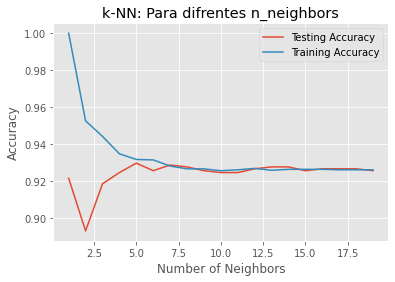

In [ ]:
#Comparando el desempeño del modelo con diferentes k-neighbors dese 1 hasta 25
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  train_accuracy[i] = knn.score(X_train, y_train)
  test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Para difrentes n_neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Con ayuda de la gráfica se estableció que n_neighbors óptimo es de 5
# Create a k-NN classifier with 5 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

#accuracy
print(knn.score(X_test, y_test))

0.9295918367346939
